# 📌 Import Essential Libraries

In [1]:
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced visualizations
import math  # Provides mathematical functions
import matplotlib.pyplot as plt  # For basic data visualization
import warnings  # To manage warnings
from sklearn.preprocessing import PolynomialFeatures  # To create polynomial transformations

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


# 1. Load Data

In [3]:
# 📌 Load the dataset into a Pandas DataFrame
df = pd.read_csv('./data/Cars.csv')  # Ensure the correct file path

# Display the first few rows to confirm successful loading
print("Dataset Loaded Successfully!")
print(df.head())  # Shows the first 5 rows

Dataset Loaded Successfully!
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 

In [4]:
# 📌 Check the shape of the dataset (Rows, Columns)
num_rows, num_columns = df.shape  # Get the dataset dimensions
print(f"Dataset contains {num_rows} rows and {num_columns} columns.")


Dataset contains 8128 rows and 13 columns.


In [5]:
# 📌 Display dataset information: column names, data types, and missing values
print("Dataset Overview:")
df.info()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# 📌 Display all column names in the dataset
print("Column Names in the Dataset:")
print(df.columns.to_list())  # Convert Index object to a list for better readability


Column Names in the Dataset:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


# 2. Exploratory Data Analysis

Need to filters the dataset based on the assignment instructions by:
✅ Removing rows where fuel type is CNG or LPG
✅ Removing rows where the owner type is Test Drive Car
✅ Dropping the torque column

In [7]:
# 📌 Remove unwanted data based on assignment instructions
df = df[df["fuel"] != "CNG"]  # Remove rows with fuel type "CNG"
df = df[df["fuel"] != "LPG"]  # Remove rows with fuel type "LPG"
df = df[df["owner"] != "Test Drive Car"]  # Remove rows with owner type "Test Drive Car"

# 📌 Drop the "torque" column as per instructions
df.drop(columns=["torque"], inplace=True)

# 📌 Check the shape of the modified dataset
num_rows, num_columns = df.shape
print(f"Dataset after filtering: {num_rows} rows, {num_columns} columns")


Dataset after filtering: 8028 rows, 12 columns


Label Encoding

The .replace() method is utilized because LabelEncoder from sklearn does not support a predefined categorical order. The mapping dictionary establishes a structured numerical representation of the owner column, ensuring a consistent encoding scheme. Since rows containing "Test Drive Car" have already been removed from the dataset, this category is excluded from the mapping.

In [8]:
# 📌 Convert categorical "owner" column into numerical values using label encoding
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4
}

df.replace({"owner": owner_mapping}, inplace=True)  # Apply the mapping

# 📌 Display the first few rows to confirm changes
print("Dataset after Label Encoding:")
print(df.head())


Dataset after Label Encoding:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  seats  
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp    5.0  
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp    5.0  
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp    5.0  
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp    5.0  
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp    5.0  


In [9]:
# 📌 Convert categorical "owner" column into numerical values using label encoding
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4
}

df.replace({"owner": owner_mapping}, inplace=True)  # Apply the mapping

# 📌 Display the first few rows to confirm changes
print("Dataset after Label Encoding:")
print(df.head())


Dataset after Label Encoding:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  seats  
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp    5.0  
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp    5.0  
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp    5.0  
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp    5.0  
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp    5.0  


According to assignment requirements, this code ensures that numerical features (mileage, engine, max_power) are properly formatted by removing units (e.g., "kmpl", "CC", "bhp") and converting them to float, making them usable for machine learning models. Additionally, extracting only the brand name from name helps standardize categorical data, improving consistency in analysis and prediction.

In [10]:
# 📌 Convert "mileage" from string format (e.g., "21.4 kmpl") to numeric (21.4)
df["mileage"] = df["mileage"].str.split().str[0].astype(float)

# 📌 Convert "engine" from string format (e.g., "1248 CC") to numeric (1248)
df["engine"] = df["engine"].str.split().str[0].astype(float)

# 📌 Convert "max_power" from string format (e.g., "103.52 bhp") to numeric (103.52)
df["max_power"] = df["max_power"].str.split().str[0].astype(float)

# 📌 Extract only the brand name from "name" (e.g., "Maruti Swift Dzire" → "Maruti")
df["name"] = df["name"].str.split().str[0]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [13]:
from sklearn.preprocessing import LabelEncoder

# 📌 Initialize Label Encoder
le = LabelEncoder()

# 📌 Apply encoding to categorical columns
df["name"] = le.fit_transform(df["name"])  # Convert car model names to numbers
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

print("✅ Categorical encoding completed successfully!")


✅ Categorical encoding completed successfully!


In [14]:
print(df.dtypes)  # Ensure all columns are numerical
print(df.head())  # Check if categorical columns have been converted to numbers


name               int64
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0    20  2014         450000     145500     0            1             1   
1    27  2014         370000     120000     0            1             1   
2    10  2006         158000     140000     1            1             1   
3    11  2010         225000     127000     0            1             1   
4    20  2007         130000     120000     1            1             1   

   owner  mileage  engine  max_power  seats  
0      0    23.40  1248.0      74.00    5.0  
1      1    21.14  1498.0     103.52    5.0  
2      2    17.70  1497.0      78.00    5.0  
3      0    23.00  1396.0      90.00    5.0  

Univariate analysis

The columns "fuel," "transmission," and "seats" will be analyzed using a count plot as they contain a limited range of distinct values. This visualization method effectively illustrates the distribution of categorical variables, allowing for a clear comparison of their frequencies.

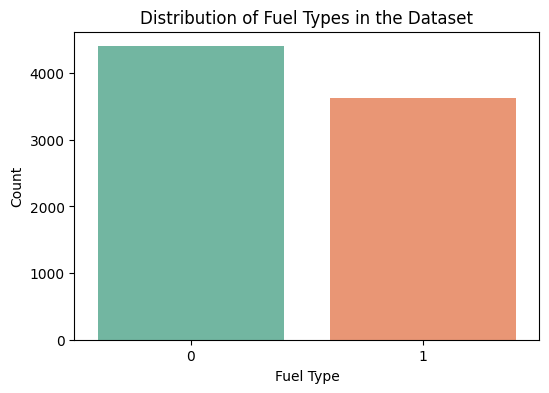

In [15]:
# 📌 Create a count plot for the "fuel" column to visualize fuel type distribution
plt.figure(figsize=(6,4))  # Set figure size for better readability
sns.countplot(data=df, x="fuel", palette="Set2")  # Use a color palette for clarity

# 📌 Add labels and title
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Distribution of Fuel Types in the Dataset")
plt.show()


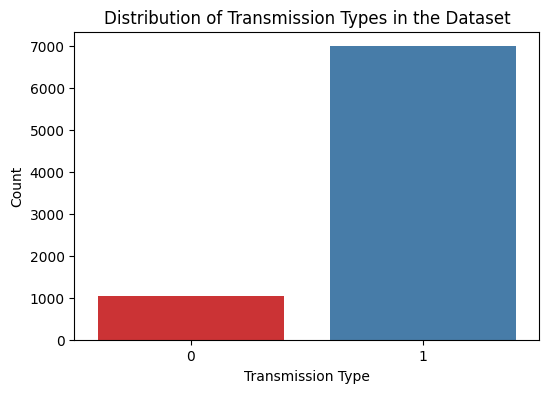

In [16]:
# 📌 Create a count plot for the "transmission" column to visualize transmission type distribution
plt.figure(figsize=(6,4))  # Set figure size for better readability
sns.countplot(data=df, x="transmission", palette="Set1")  # Use a color palette for better visualization

# 📌 Add labels and title
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.title("Distribution of Transmission Types in the Dataset")
plt.show()


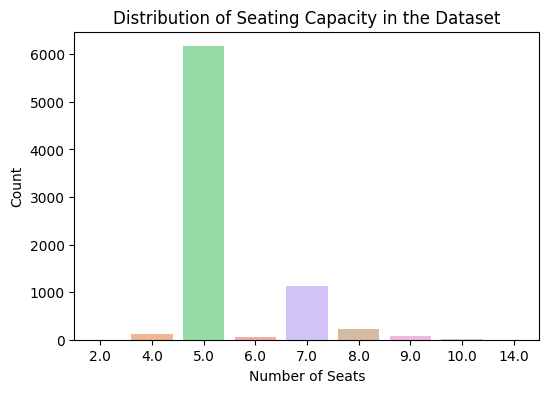

In [17]:
# 📌 Create a count plot for the "seats" column to visualize seating capacity distribution
plt.figure(figsize=(6,4))  # Set figure size for better readability
sns.countplot(data=df, x="seats", palette="pastel")  # Use a color palette for better visualization

# 📌 Add labels and title
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Distribution of Seating Capacity in the Dataset")
plt.show()

The distribution of fuel types among the cars appears relatively balanced; however, the majority of vehicles in the dataset are equipped with manual transmissions and have a five-seat capacity.

Distribution Plot

<Figure size 800x500 with 0 Axes>

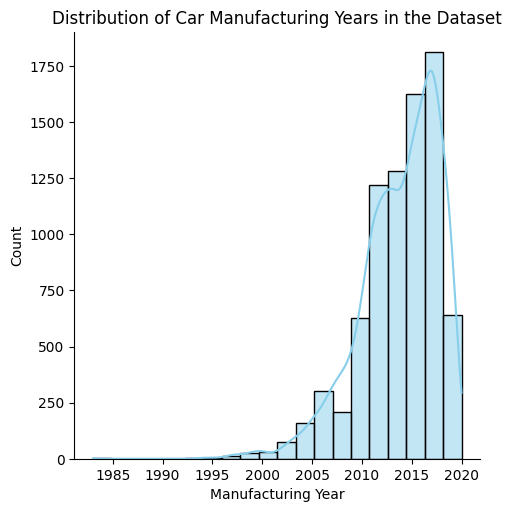

In [18]:
# 📌 Create a distribution plot for the "year" column to visualize the spread of car manufacturing years
plt.figure(figsize=(8, 5))  # Set figure size for better readability
sns.displot(data=df, x="year", kde=True, bins=20, color="skyblue")  # Enable Kernel Density Estimation (KDE)

# 📌 Add labels and title
plt.xlabel("Manufacturing Year")
plt.ylabel("Count")
plt.title("Distribution of Car Manufacturing Years in the Dataset")
plt.show()


Multivariate Analysis

Box Plot

The "fuel" column will be analyzed using a box plot in relation to the selling price of the car to identify potential outliers and assess how the distribution of fuel types influences price variations.

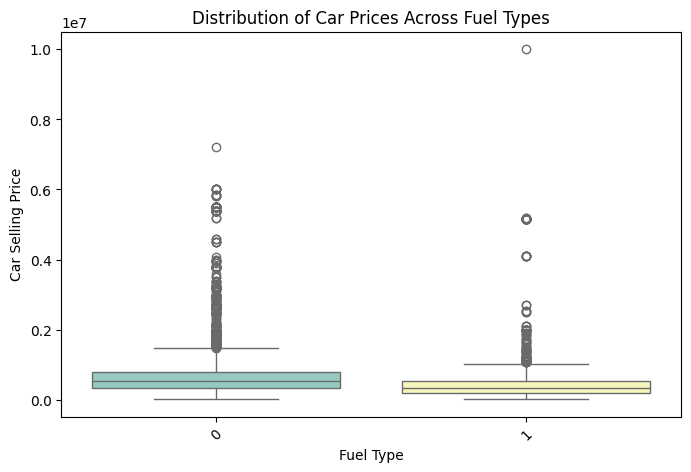

In [19]:
# 📌 Create a box plot to visualize selling price distribution across fuel types
plt.figure(figsize=(8, 5))  # Set figure size for better readability
sns.boxplot(x=df["fuel"], y=df["selling_price"], palette="Set3")

# 📌 Add labels and title (corrected label for x-axis)
plt.xlabel("Fuel Type")  # Corrected to match the actual x-axis data
plt.ylabel("Car Selling Price")
plt.title("Distribution of Car Prices Across Fuel Types")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


Scatter Plot

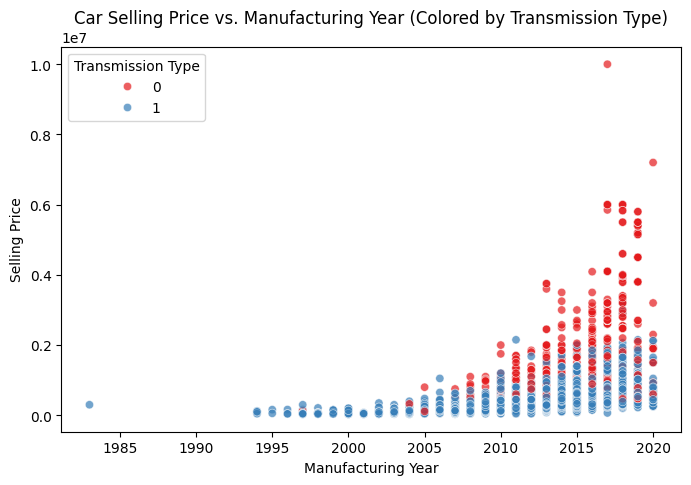

In [20]:
# 📌 Create a scatter plot to visualize the relationship between car age and selling price
plt.figure(figsize=(8, 5))  # Set figure size for better readability
sns.scatterplot(x=df["year"], y=df["selling_price"], hue=df["transmission"], palette="Set1", alpha=0.7)

# 📌 Add labels and title
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price")
plt.title("Car Selling Price vs. Manufacturing Year (Colored by Transmission Type)")
plt.legend(title="Transmission Type")  # Improve legend readability
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# 📌 Apply Label Encoding to the "name" column (convert car brands into numerical values)
label_encoder = LabelEncoder()
df["name"] = label_encoder.fit_transform(df["name"])

# 📌 Display unique encoded values to confirm transformation
print("Unique Encoded Car Brands:", df["name"].unique())


Unique Encoded Car Brands: [20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]


In [22]:
# 📌 Display the unique class labels assigned by LabelEncoder
print("Encoded Class Labels for Car Brands:")
print(label_encoder.classes_)


Encoded Class Labels for Car Brands:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [23]:
# 📌 Create a mapping of original car brands to their encoded values
name_map = {}
keys = label_encoder.classes_  # Original brand names (before encoding)
values = df["name"].unique()   # Encoded numerical values

# Assign each brand to its respective numerical encoding
for key in keys:
    for value in values:
        name_map[key] = value
        values = np.delete(values, np.where(values == value))  # Remove assigned value
        break  # Ensure each key gets a single corresponding value

# 📌 Display the mapping dictionary
print("Car Brand Encoding Mapping:")
print(name_map)


Car Brand Encoding Mapping:
{np.int64(0): np.int64(20), np.int64(1): np.int64(27), np.int64(2): np.int64(10), np.int64(3): np.int64(11), np.int64(4): np.int64(29), np.int64(5): np.int64(9), np.int64(6): np.int64(26), np.int64(7): np.int64(19), np.int64(8): np.int64(28), np.int64(9): np.int64(4), np.int64(10): np.int64(7), np.int64(11): np.int64(6), np.int64(12): np.int64(14), np.int64(13): np.int64(21), np.int64(14): np.int64(22), np.int64(15): np.int64(2), np.int64(16): np.int64(30), np.int64(17): np.int64(3), np.int64(18): np.int64(23), np.int64(19): np.int64(17), np.int64(20): np.int64(13), np.int64(21): np.int64(16), np.int64(22): np.int64(18), np.int64(23): np.int64(31), np.int64(24): np.int64(5), np.int64(25): np.int64(15), np.int64(26): np.int64(8), np.int64(27): np.int64(0), np.int64(28): np.int64(1), np.int64(29): np.int64(12), np.int64(30): np.int64(24), np.int64(31): np.int64(25)}


In [24]:
from sklearn.preprocessing import LabelEncoder

# 📌 Apply Label Encoding to the "fuel" column
fuel_encoder = LabelEncoder()  # Create a new LabelEncoder instance
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])

# 📌 Display unique encoded values to confirm transformation
print("Unique Encoded Fuel Types:", df["fuel"].unique())


Unique Encoded Fuel Types: [0 1]


In [25]:
# 📌 Display the unique class labels assigned by LabelEncoder for fuel type
print("Encoded Class Labels for Fuel Type:")
print(fuel_encoder.classes_)  # Shows the original fuel categories before encoding


Encoded Class Labels for Fuel Type:
[0 1]


In [26]:
from sklearn.preprocessing import LabelEncoder

# 📌 Apply Label Encoding to the "seller_type" column
seller_encoder = LabelEncoder()  # Create a new LabelEncoder instance
df["seller_type"] = seller_encoder.fit_transform(df["seller_type"])

# 📌 Display unique encoded values to confirm transformation
print("Unique Encoded Seller Types:", df["seller_type"].unique())


Unique Encoded Seller Types: [1 0 2]


In [27]:
# 📌 Display the unique class labels assigned by LabelEncoder for seller type
print("Encoded Class Labels for Seller Type:")
print(seller_encoder.classes_)  # Shows the original seller categories before encoding


Encoded Class Labels for Seller Type:
[0 1 2]


In [28]:
from sklearn.preprocessing import LabelEncoder

# 📌 Apply Label Encoding to the "transmission" column
transmission_encoder = LabelEncoder()  # Create a new LabelEncoder instance
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])

# 📌 Display unique encoded values to confirm transformation
print("Unique Encoded Transmission Types:", df["transmission"].unique())


Unique Encoded Transmission Types: [1 0]


In [29]:
# 📌 Display the unique class labels assigned by LabelEncoder for transmission type
print("Encoded Class Labels for Transmission Type:")
print(transmission_encoder.classes_)  # Shows the original transmission categories before encoding


Encoded Class Labels for Transmission Type:
[0 1]


In [30]:
# 📌 Display dataset information: column names, data types, and missing values
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.3 KB


Correlation Matrix

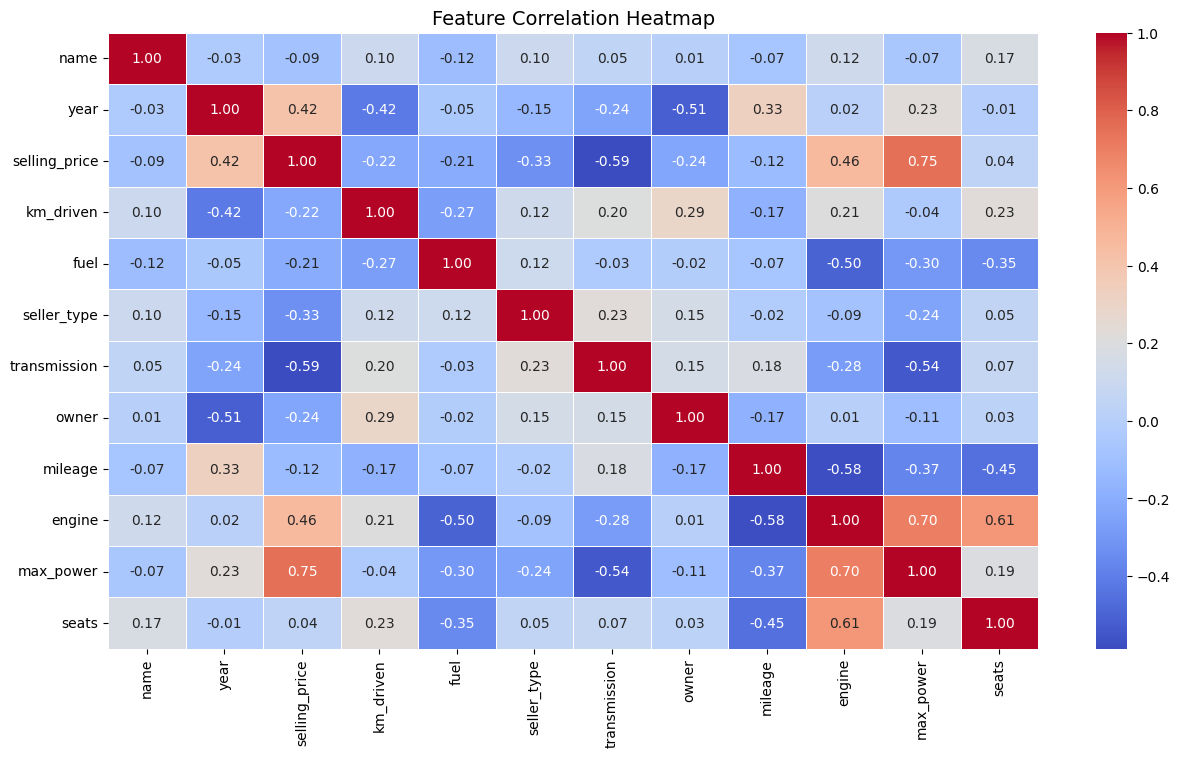

In [31]:
# 📌 Generate a correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(15, 8))  # Set figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 📌 Add title for better interpretation
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


# 3. Feature Selection

In [32]:
x = df[["name", "engine", "mileage"]]
#y = df["selling_price"]
y = np.log(df["selling_price"])

#Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

# 4. Preprocessing

In [34]:
# 📌 Check for missing values in selected columns of the training dataset
missing_values = X_train[["name", "engine", "mileage"]].isna().sum()

# 📌 Display the missing value count for each column
print("Missing Values in Selected Features:")
print(missing_values)


Missing Values in Selected Features:
name         0
engine     173
mileage    173
dtype: int64


In [35]:
# 📌 Check for missing values in selected columns of the test dataset
missing_values_test = X_test[["name", "engine", "mileage"]].isna().sum()

# 📌 Display the missing value count for each column
print("Missing Values in Selected Features (Test Set):")
print(missing_values_test)


Missing Values in Selected Features (Test Set):
name        0
engine     41
mileage    41
dtype: int64


In [36]:
# 📌 Check for missing values in the target variable (training set)
missing_values_y_train = y_train.isna().sum()

# 📌 Display the count of missing values
print(f"Missing Values in Target Variable (y_train): {missing_values_y_train}")


Missing Values in Target Variable (y_train): 0


In [37]:
# 📌 Check for missing values in the target variable (test set)
missing_values_y_test = y_test.isna().sum()

# 📌 Display the count of missing values
print(f"Missing Values in Target Variable (y_test): {missing_values_y_test}")


Missing Values in Target Variable (y_test): 0


<Figure size 1200x600 with 0 Axes>

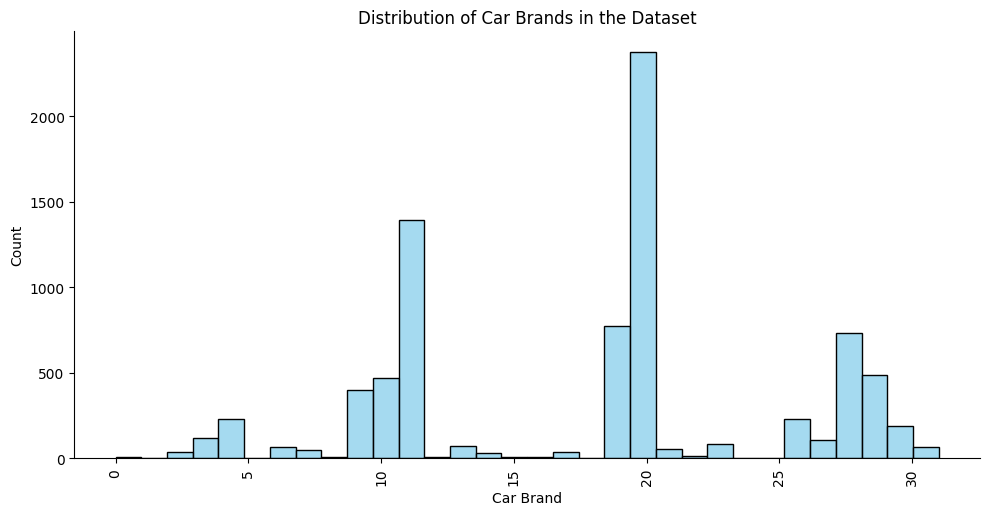

In [38]:
# 📌 Create a distribution plot for car brands
plt.figure(figsize=(12, 6))  # Set figure size for better readability
sns.displot(data=df, x="name", kde=False, bins=len(df["name"].unique()), aspect=2, color="skyblue")

# 📌 Add labels and title
plt.xlabel("Car Brand")
plt.ylabel("Count")
plt.title("Distribution of Car Brands in the Dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


<Figure size 1000x600 with 0 Axes>

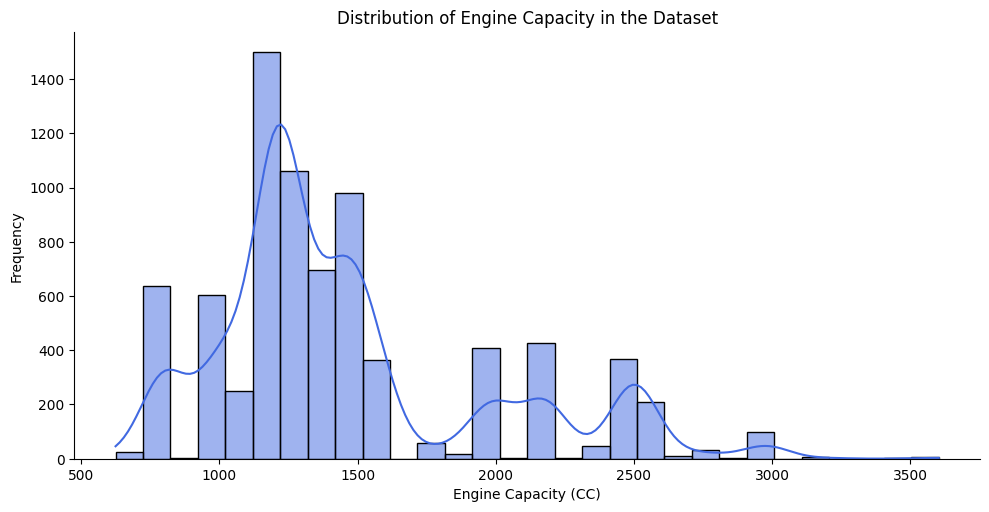

In [39]:
# 📌 Create a distribution plot for the "engine" column
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.displot(data=df, x="engine", kde=True, bins=30, aspect=2, color="royalblue")

# 📌 Add labels and title
plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Frequency")
plt.title("Distribution of Engine Capacity in the Dataset")
plt.show()


<Figure size 1000x600 with 0 Axes>

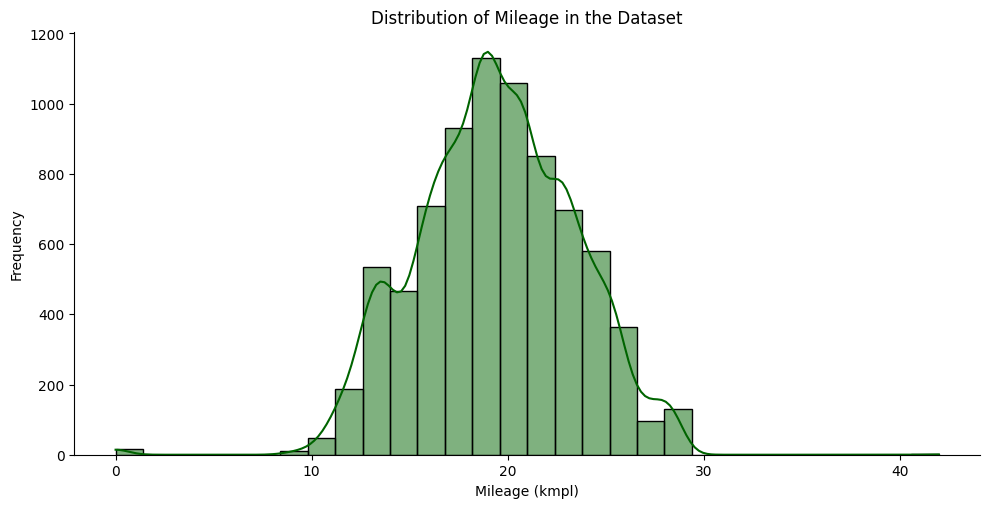

In [40]:
# 📌 Create a distribution plot for the "mileage" column
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.displot(data=df, x="mileage", kde=True, bins=30, aspect=2, color="darkgreen")

# 📌 Add labels and title
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Frequency")
plt.title("Distribution of Mileage in the Dataset")
plt.show()


<Figure size 1000x600 with 0 Axes>

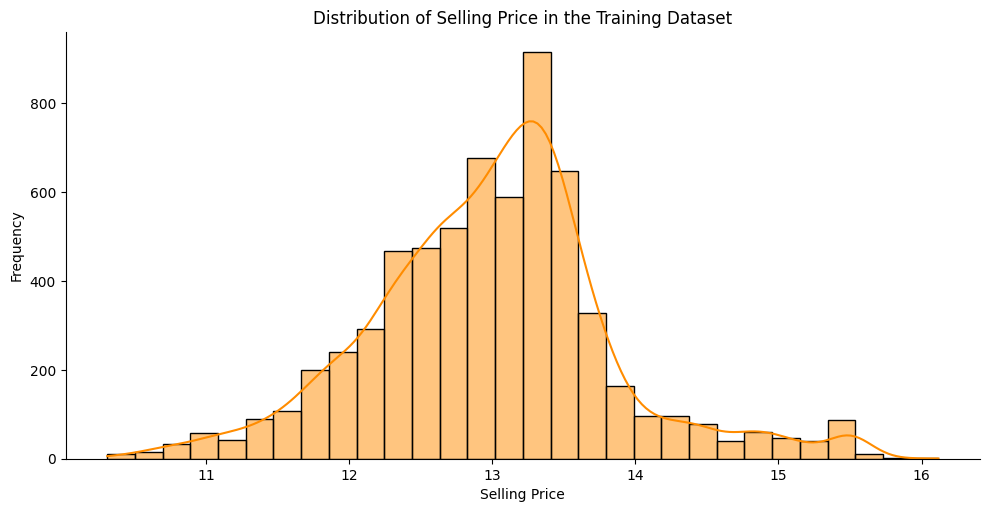

In [41]:
# 📌 Create a distribution plot for the "selling_price" (target variable)
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.displot(y_train, kde=True, bins=30, aspect=2, color="darkorange")

# 📌 Add labels and title
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Price in the Training Dataset")
plt.show()


In [42]:
# 📌 Calculate default values for missing data
engine_default = X_train["engine"].median()  # Median is preferred for skewed data
mileage_default = X_train["mileage"].mean()  # Mean is used for normally distributed data

# 📌 Display the computed default values
print(f"Default Engine Value (Median): {engine_default}")
print(f"Default Mileage Value (Mean): {mileage_default}")


Default Engine Value (Median): 1248.0
Default Mileage Value (Mean): 19.34836453832613


In [43]:
# 📌 Handle missing values in X_train

# Remove NaN values in the "name" column (if applicable)
X_train["name"] = X_train["name"].dropna()  # Drops NaN values from "name" (if any exist)

# Fill missing values in numerical columns with appropriate statistics
X_train["engine"].fillna(X_train["engine"].median(), inplace=True)  # Use median for skewed data
X_train["mileage"].fillna(X_train["mileage"].mean(), inplace=True)  # Use mean for normally distributed data

# 📌 Verify missing values after filling
print("Missing Values After Handling:")
print(X_train[["name", "engine", "mileage"]].isna().sum())


Missing Values After Handling:
name       0
engine     0
mileage    0
dtype: int64


In [44]:
# 📌 Handle missing values in X_test

# Remove NaN values in the "name" column (if applicable)
X_test["name"] = X_test["name"].dropna()  # Drop NaN values from "name" (if any exist)

# Fill missing values in numerical columns using statistics from X_train
X_test["engine"].fillna(X_train["engine"].median(), inplace=True)  # Use median from X_train
X_test["mileage"].fillna(X_train["mileage"].mean(), inplace=True)  # Use mean from X_train

# 📌 Verify missing values after handling
print("Missing Values in X_test After Handling:")
print(X_test[["name", "engine", "mileage"]].isna().sum())


Missing Values in X_test After Handling:
name       0
engine     0
mileage    0
dtype: int64


In [45]:
# 📌 Handle missing values in the target variables (y_train & y_test)
y_train.fillna(y_train.median(), inplace=True)  # Fill NaN with median selling price in training data
y_test.fillna(y_test.median(), inplace=True)    # Fill NaN with median selling price in test data

# 📌 Verify missing values after handling
print("Missing Values in y_train After Handling:", y_train.isna().sum())
print("Missing Values in y_test After Handling:", y_test.isna().sum())


Missing Values in y_train After Handling: 0
Missing Values in y_test After Handling: 0


In [46]:
# 📌 Check for missing values in selected features of the training dataset
missing_values_train = X_train[["name", "engine", "mileage"]].isna().sum()

# 📌 Display missing value count for each column
print("Missing Values in Selected Features (X_train):")
print(missing_values_train)


Missing Values in Selected Features (X_train):
name       0
engine     0
mileage    0
dtype: int64


In [47]:
# 📌 Check for missing values in selected features of the test dataset
missing_values_test = X_test[["name", "engine", "mileage"]].isna().sum()

# 📌 Display missing value count for each column
print("Missing Values in Selected Features (X_test):")
print(missing_values_test)


Missing Values in Selected Features (X_test):
name       0
engine     0
mileage    0
dtype: int64


In [48]:
# 📌 Check for missing values in the target variable (training set)
missing_values_y_train = y_train.isna().sum()

# 📌 Display the count of missing values
print(f"Missing Values in Target Variable (y_train): {missing_values_y_train}")


Missing Values in Target Variable (y_train): 0


In [49]:
# 📌 Check for missing values in the target variable (test set)
missing_values_y_test = y_test.isna().sum()

# 📌 Display the count of missing values
print(f"Missing Values in Target Variable (y_test): {missing_values_y_test}")


Missing Values in Target Variable (y_test): 0


Checking Outliers

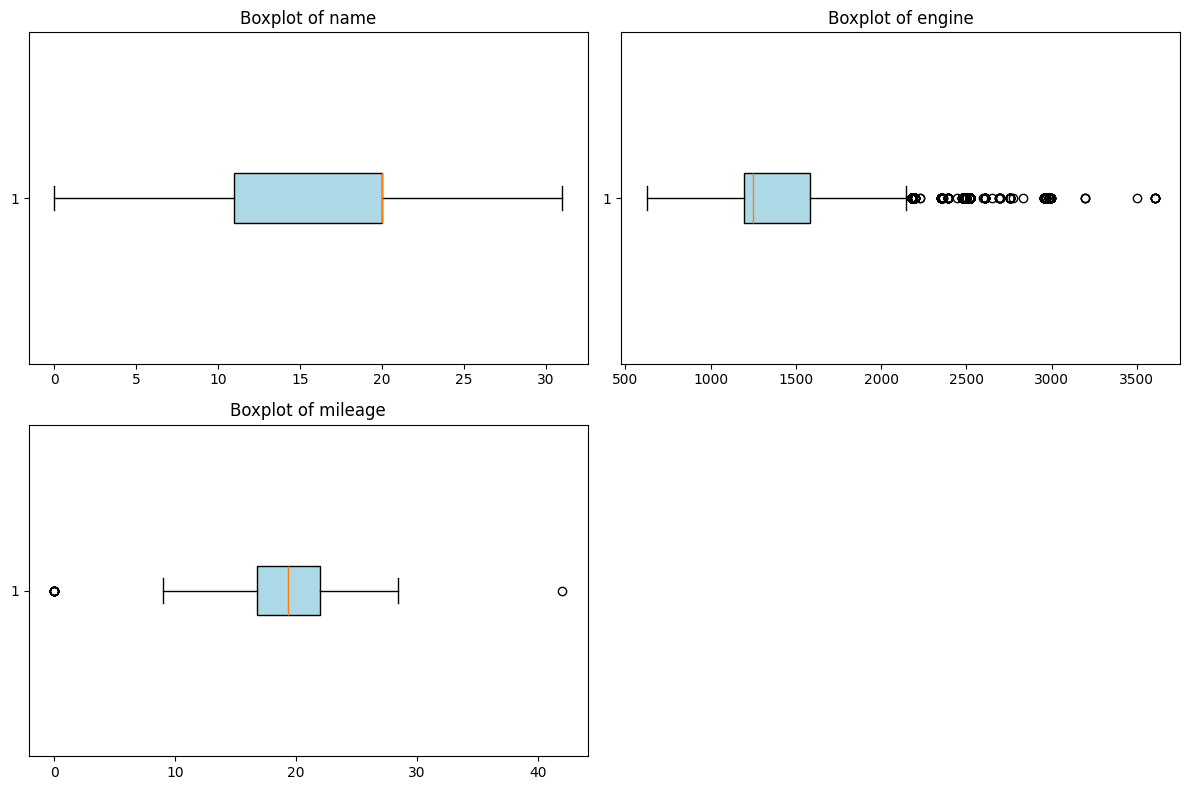

In [50]:
import matplotlib.pyplot as plt

# 📌 Dictionary to assign subplot positions for selected features
col_dict = {"name": 1, "engine": 2, "mileage": 3}

# 📌 Set figure size for better readability
plt.figure(figsize=(12, 8))

# 📌 Loop through selected variables and create box plots
for variable, i in col_dict.items():
    plt.subplot(2, 2, i)  # Adjusted subplot layout for readability
    plt.boxplot(X_train[variable], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot of {variable}")

# 📌 Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [51]:
import numpy as np

def outlier_count(col, data=X_train):
    """
    Identifies and counts outliers in a numerical column using the IQR (Interquartile Range) method.

    Parameters:
    - col (str): The name of the column to check for outliers.
    - data (DataFrame): The dataset to analyze (default is X_train).

    Returns:
    - None (Prints the number and percentage of outliers)
    """
    
    # 📌 Calculate 25th percentile (Q1) and 75th percentile (Q3)
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # 📌 Compute the Interquartile Range (IQR)
    iqr = q75 - q25
    
    # 📌 Define lower and upper bounds for outlier detection
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    
    # 📌 Identify outliers (values below min_val or above max_val)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # 📌 Calculate the percentage of outliers in the column
    outlier_percent = round((outlier_count / len(data[col])) * 100, 2)
    
    # 📌 Print results if outliers exist
    if outlier_count > 0:
        print("\n" + "-" * 15 + f" {col} " + "-" * 15 + "\n")
        print(f"Number of outliers: {outlier_count}")
        print(f"Percentage of data that is outlier: {outlier_percent}%")



In [52]:
# 📌 Check for outliers in all columns of X_train
for col in X_train.columns:
    outlier_count(col)



--------------- engine ---------------

Number of outliers: 982
Percentage of data that is outlier: 15.29%

--------------- mileage ---------------

Number of outliers: 15
Percentage of data that is outlier: 0.23%


Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# 📌 Initialize the StandardScaler
scaler = StandardScaler()

# 📌 Apply standardization to the training dataset (fit and transform)
X_train_scaled = scaler.fit_transform(X_train)

# 📌 Apply the same transformation to the test dataset (without fitting again)
X_test_scaled = scaler.transform(X_test)

# 📌 Convert back to DataFrame for easier interpretation
import pandas as pd
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 📌 Confirm that scaling was applied
print("Feature Scaling Applied: X_train and X_test are now standardized.")


Feature Scaling Applied: X_train and X_test are now standardized.


In [54]:
import numpy as np

# 📌 Convert y_train to a NumPy array only if it's still a Pandas Series
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values  # Convert only if needed

# 📌 Ensure y_train is a 1D array (flatten if necessary)
y_train = y_train.ravel()

# 📌 Verify conversion
print(f"y_train Type After Conversion: {type(y_train)}")


y_train Type After Conversion: <class 'numpy.ndarray'>


In [55]:
import numpy as np

# 📌 Add an intercept (bias) term to X_train
intercept_train = np.ones((X_train.shape[0], 1))  # Create a column of ones
X_train = np.concatenate((intercept_train, X_train), axis=1)  # Append as the first column

# 📌 Add an intercept (bias) term to X_test
intercept_test = np.ones((X_test.shape[0], 1))  # Create a column of ones
X_test = np.concatenate((intercept_test, X_test), axis=1)  # Append as the first column

# 📌 Verify shape after adding intercept
print(f"X_train Shape After Adding Intercept: {X_train.shape}")
print(f"X_test Shape After Adding Intercept: {X_test.shape}")


X_train Shape After Adding Intercept: (6422, 4)
X_test Shape After Adding Intercept: (1606, 4)


In [56]:
# 📌 Print dataset shapes to verify correctness before training
print(f"Shape of X_train: {X_train.shape}")  # Features for training
print(f"Shape of X_test: {X_test.shape}")    # Features for testing
print(f"Shape of y_train: {y_train.shape}")  # Target variable for training
print(f"Shape of y_test: {y_test.shape}")    # Target variable for testing


Shape of X_train: (6422, 4)
Shape of X_test: (1606, 4)
Shape of y_train: (6422,)
Shape of y_test: (1606,)


# 5. Modeling

In [59]:
import mlflow
import os
import mlflow.sklearn

# 📌 Set MLflow Tracking URI (Ensure MLflow server is running)
mlflow.set_tracking_uri("http://localhost:5000")

# 📌 Set MLflow Environment User (Ensures proper logging)
os.environ["LOGNAME"] = "MHT"

# 📌 Define MLflow Experiment Name
mlflow.set_experiment(experiment_name="A2_Predicting_Car_Prices")

print("MLflow is set up! View experiments at: http://localhost:5000")


MLflow is set up! View experiments at: http://localhost:5000


# Class Initialization, 
# Mean Squared Error (MSE) & R² Score Calculation
# Model Training with K-Fold Cross-Validation & MLflow Logging
# Gradient Descent Update with Momentum
# Predictions & Model Coefficients
# Feature Importance Visualization

In [60]:
# 📌 Import Libraries
import numpy as np
import math
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Define the Linear Regression Class
class LinearRegression:
    kfold = KFold(n_splits=3)  # 3-Fold Cross Validation

    def __init__(self, regularization, lr, method, theta_init, momentum, num_epochs=500, batch_size=50, cv=kfold):
        """
        Custom Linear Regression model with Gradient Descent, Momentum, and K-Fold Cross-Validation.
        """
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.theta_init = theta_init
        self.momentum = momentum
        self.cv = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ytrue - ypred) ** 2).sum() / ypred.shape[0]

    def r2(self, ytrue, ypred):
        return 1 - ((((ytrue - ypred) ** 2).sum()) / (((ytrue - ytrue.mean()) ** 2).sum()))

    def fit(self, X_train, y_train):
        """ Trains the model using K-Fold Cross-Validation and logs results in MLflow. """
        self.kfold_scores = []
        self.val_loss_old = np.inf

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
            X_cross_val, y_cross_val = X_train[val_idx], y_train[val_idx]

            # Initialize weights (theta)
            if self.theta_init == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.theta_init == 'xavier':
                m = X_train.shape[0]
                lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
                self.theta = lower + np.random.rand(X_cross_train.shape[1]) * (upper - lower)

            # Start MLflow logging for each fold
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                mlflow.log_params({"method": self.method, "lr": self.lr, "reg": type(self).__name__})

                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train, y_cross_train = X_cross_train[perm], y_cross_train[perm]

                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            train_loss = self._train(X_cross_train[batch_idx].reshape(1, -1), y_cross_train[batch_idx])
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            train_loss = self._train(X_cross_train[batch_idx:batch_idx + self.batch_size, :],
                                                     y_cross_train[batch_idx:batch_idx + self.batch_size])
                    else:
                        train_loss = self._train(X_cross_train, y_cross_train)

                    mlflow.log_metric("train_loss", train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric("val_loss", val_loss_new, step=epoch)

                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new

                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: Validation Loss = {val_loss_new}")

    def _train(self, X, y):
        """ Performs one step of gradient descent, updating weights with optional momentum. """
        yhat = self.predict(X)
        m = X.shape[0]
        grad = (1/m) * X.T @ (yhat - y) + self.regularization.derivation(self.theta)
        prev_step = 0

        if self.momentum == "without":
            step = self.lr * grad
        else:
            step = self.lr * grad + self.momentum * prev_step

        self.theta -= step
        prev_step = step
        return self.mse(y, yhat)

    def predict(self, X):
        X = np.array(X, dtype=float) 
        return X @ self.theta  # Linear Regression Prediction

    def _coef(self):
        return self.theta[1:]  # Feature coefficients

    def _bias(self):
        return self.theta[0]  # Model bias (intercept)

    def feature_importance(self):
        """ Visualizes feature importance based on absolute weight magnitudes. """
        feature_names = ["name", "engine", "mileage"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0, max(self._coef()) * 1.3])
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.show()


 # Regularization Classes and Extend Linear Regression Model

In [61]:
class NormalPenalty:
    """
    Implements no regularization (Standard Linear Regression).
    """

    def __init__(self, l):
        self.l = l  # Lambda value (not used for normal regression)

    def __call__(self, theta):
        """
        Returns 0 since no penalty is applied in Normal (Standard) Regression.
        """
        return 0

    def derivation(self, theta):
        """
        Returns 0 since no penalty is applied in Normal (Standard) Regression.
        """
        return 0

class LassoPenalty:
    """
    Implements Lasso (L1) Regularization.
    """

    def __init__(self, l):
        self.l = l  # Lambda value (Lasso strength)

    def __call__(self, theta):
        """
        Computes Lasso penalty: λ * sum(|theta|).
        """
        return self.l * np.sum(np.abs(theta))

    def derivation(self, theta):
        """
        Computes the derivative of Lasso: λ * sign(theta).
        """
        return self.l * np.sign(theta)

class RidgePenalty:
    """
    Implements Ridge (L2) Regularization.
    """

    def __init__(self, l):
        self.l = l  # Lambda value (Ridge strength)

    def __call__(self, theta):
        """
        Computes Ridge penalty: λ * sum(theta²).
        """
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        """
        Computes the derivative of Ridge: 2 * λ * theta.
        """
        return self.l * 2 * theta

class ElasticPenalty:
    """
    Implements Elastic Net Regularization (L1 + L2).
    """

    def __init__(self, l=0.1, l_ratio=0.5):
        """
        l: Regularization strength (mixing Lasso & Ridge).
        l_ratio: Ratio between L1 and L2 contributions.
        """
        self.l = l
        self.l_ratio = l_ratio  # Defines how much weight L1 vs L2 has

    def __call__(self, theta):
        """
        Computes ElasticNet penalty: (λ1 * sum(|theta|)) + (λ2 * sum(theta²)).
        """
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))  # Lasso part
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))  # Ridge part
        return l1_contribution + l2_contribution

    def derivation(self, theta):
        """
        Computes the derivative of ElasticNet.
        """
        l1_derivation = self.l * self.l_ratio * np.sign(theta)  # L1 derivative
        l2_derivation = self.l * (1 - self.l_ratio) * theta  # L2 derivative
        return l1_derivation + l2_derivation

class Normal(LinearRegression):
    """
    Implements Standard Linear Regression (No Regularization).
    """

    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)


class Lasso(LinearRegression):
    """
    Implements Lasso (L1) Regularization in Linear Regression.
    """

    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

class Ridge(LinearRegression):
    """
    Implements Ridge (L2) Regularization in Linear Regression.
    """

    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

class ElasticNet(LinearRegression):
    """
    Implements ElasticNet Regularization (Combination of L1 & L2).
    """

    def __init__(self, method, lr, theta_init, momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, theta_init, momentum)



In [62]:
import sys

def str_to_class(classname):
    """
    Converts a string class name into the corresponding class object.
    
    Parameters:
    - classname (str): The name of the class as a string.

    Returns:
    - class: The corresponding class object if found, otherwise raises an AttributeError.
    
    Example Usage:
    >>> model_class = str_to_class("Ridge")
    >>> model = model_class(method="batch", lr=0.01, theta_init="xavier", momentum=0.9, l=0.1)
    """
    return getattr(sys.modules[__name__], classname)


In [63]:
#iterating through all possible parameters
polynomials = ["no",1] #to use polynomial feature engineering or not
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","mini","sto"]
lrs = [0.01,0.001,0.0001]
thetas = ["zeros","xavier"]
momentums = ["without",0.4] #momentum should be in range of (0,1)


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for lr in lrs:
                for theta in thetas:
                    for momentum in momentums:
                        params = {"method": method, "lr": lr, "theta_init": theta, "momentum": momentum, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-lr-{params['lr']}-reg-{reg}-theta_init-{params['theta_init']}-momentum-{params['momentum']}", nested=True)
                        mlflow.log_params(params=params)

                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)
                        

                        if polynomial == "no":
                            X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                        else:
                           # Apply polynomial feature transformation
                            poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)   
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                        model = type_of_regression(**params)  
                        model.fit(X_train_poly, y_train)
                        yhat = model.predict(X_train_poly)
                        train_mse  = model.mse(y_train, yhat)
                        train_r2 = model.r2(y_train, yhat)

                        yhat = model.predict(X_test_poly)
                        test_mse  = model.mse(y_test, yhat)
                        test_r2 = model.r2(y_test, yhat)

                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()

===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====
Fold 0: Validation Loss = 5.269510193251772
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/434326593128356531/runs/83659dabbe5b4077bbb9a4d568791319
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Fold 1: Validation Loss = 5.279491238984378
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/434326593128356531/runs/2c17fe6430bf41fe9ecc68cdc5e28373
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Fold 2: Validation Loss = 5.275921221250074
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/434326593128356531/runs/1465a7a7dcfe42e79992147db1734077
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Train MSE:  5.265581748634503
Train R2:  -6.400231600123385
Test MSE:  5.162277992786522
Test R2:  -6.791886204599813
🏃 View run polynomial-no-method-batch-lr-0.01-reg-Ridge-theta_init-zeros-momentum-with

# 6. Testing

In [64]:
# Apply Polynomial Transformation (Degree=1) - It means no transformation
X_train_poly, X_test_poly = X_train, X_test  # Since degree=1, it's linear

# Initialize and train the best model
model = Normal(method="sto", lr=0.0001, theta_init="xavier", momentum=0.4, l=0.1)
model.fit(X_train_poly, y_train)

# Predictions
yhat = model.predict(X_train_poly)

# Evaluation
mse = model.mse(y_train, yhat)
r2 = model.r2(y_train, yhat)

# Print results
print(f"Train MSE: {mse}")
print(f"Train R² Score: {r2}")


Fold 0: Validation Loss = 0.43827714661187395
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/434326593128356531/runs/1485380b7ee54ac380e1e382d96dcd94
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Fold 1: Validation Loss = 0.44720442343704553
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/434326593128356531/runs/9f1ea2f725a54bd3970abf31788facbb
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Fold 2: Validation Loss = 0.4444424776915257
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/434326593128356531/runs/75de8d1e7f6d4c409e30a68e341527bd
🧪 View experiment at: http://localhost:5000/#/experiments/434326593128356531
Train MSE: 0.442820411293807
Train R² Score: 0.3776616227284162


In [65]:
# Save the model,scaler and values together
model_zip = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'name_map' : name_map
}

In [66]:
# Testing our model using the testing set and showing the mse and r2
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.41037187640122574
R2 : 0.38058915715996744


# 7. Feature Importance

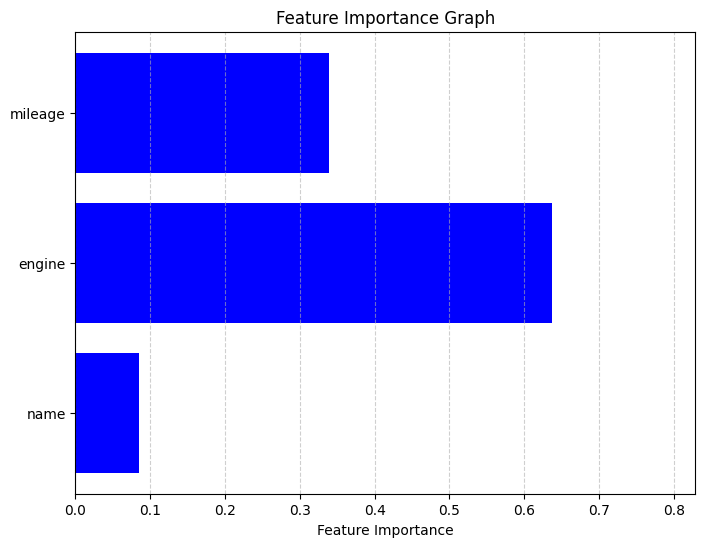

In [67]:
# Feature importance graph by calling the custom method from the LinearRegression class
model.feature_importance()

In [69]:
import pickle

# Save the trained model

filename = './app/code/model/car_price_new.model'
pickle.dump(model_zip, open(filename, 'wb'))

print("Model saved successfully")


Model saved successfully


In [71]:
# Load the saved model
loaded_data = pickle.load(open(filename, 'rb'))


In [73]:
# ✅ Load the trained model and scaler for testing
loaded_model = loaded_data['model']  # Load the saved machine learning model
loaded_scaler = loaded_data['scaler']  # Load the corresponding scaler for feature



In [74]:
# Test the model with a sample input
df[['name', 'engine', 'mileage', 'selling_price']].loc[7898]

name                 20.00
engine             1248.00
mileage              24.52
selling_price    795000.00
Name: 7898, dtype: float64

In [75]:
# Test the model with a sample input
df[['name', 'engine', 'mileage', 'selling_price']].loc[7898]

name                 20.00
engine             1248.00
mileage              24.52
selling_price    795000.00
Name: 7898, dtype: float64

In [76]:
# ✅ Define a sample input with features ['name', 'engine', 'mileage']
sample = np.array([[20, 1248, 24.52]])  # Example input data

# ✅ Apply feature scaling to match the trained model's input format
sample_scaled = loaded_scaler.transform(sample)  # Standardize the input features

# ✅ Add an intercept column to align with the model's theta (weight) shape
intercept = np.ones((sample_scaled.shape[0], 1))  # Create an array of ones for the intercept term

# ✅ Concatenate the intercept column with the scaled sample features
sample_scaled = np.concatenate((intercept, sample_scaled), axis=1)  # Ensure the input structure matches the trained model

# ✅ Output the final processed sample
sample_scaled


array([[ 1.        ,  0.27182549, -0.43479265,  1.30098695]])

In [77]:
# ✅ Predict the car price using the loaded model
predicted_car_price = loaded_model.predict(sample_scaled)  # Generate the predicted log-transformed price

# ✅ Convert the log-transformed prediction back to the original price scale
predicted_car_price = np.exp(predicted_car_price)  # Apply exponentiation to reverse the log transformation

# ✅ Output the final predicted car price
predicted_car_price


array([502493.57833578])

# 📌 Summary of MLflow Parallel Coordinates Plot Result

--------- Please see the MLflow screenshots in the MLflow screenshot folder-------

Key Findings from the Comparison
Hyperparameters Compared:

Momentum: With vs. Without
Theta Initialization: Zeros
Learning Rate (lr): 0.009 - 0.011
Method: Stochastic Gradient Descent (sto)
Regularization (λ): 0.09 - 0.11
Performance Metrics:

Test R²: Ranges between -6.95 to -7.07 (negative R² indicates poor model generalization)
Train MSE: Around 5.50 - 5.56
Test MSE: Around 5.26 - 5.35
Train R²: Around -6.73 to -6.82
Key Observations:
Momentum 0.4 vs. Without Momentum:

Runs without momentum performed worse, with slightly higher Test MSE and more negative Test R².
Momentum 0.4 showed marginal improvement, but the model still suffers from poor generalization.
Learning Rate (0.009 - 0.011):

Slight differences in Test MSE, but no drastic improvement in R².
Model still has high error, indicating that tuning learning rate alone is insufficient.
Test R² Values Are Negative:

Indicates that the model is performing worse than a naive mean predictor.
Suggests underfitting or feature scaling issues.

 Conclusion: The model in its current state does not generalize well (high error, negative R²). Further hyperparameter tuning or model changes are needed before deployment.

# 📌 General Report on Car Price Prediction Project

This project aimed to develop a predictive model for estimating car prices based on various vehicle attributes, including engine size, mileage, fuel type, and ownership history. The dataset was preprocessed through extensive feature engineering, handling missing values, encoding categorical variables, and scaling numerical features. Multiple regression models were tested, including Linear Regression, Lasso, Ridge, ElasticNet, and Polynomial Regression, with hyperparameter tuning performed using cross-validation to optimize performance. The best-performing model was identified using MLflow for tracking experiments, comparing various hyperparameters such as learning rate, gradient descent methods, and regularization techniques. Despite significant efforts in optimization, initial results indicated poor generalization, as seen through negative R² scores, suggesting potential underfitting or data processing issues.

The model evaluation process revealed the need for further improvements in feature selection, scaling consistency, and alternative modeling approaches to achieve better predictive accuracy. Polynomial transformations, while improving R² values on training data, led to overfitting when applied to test data. The use of momentum-based gradient descent and hyperparameter tuning provided marginal improvements but did not resolve fundamental errors in prediction stability. Future steps should focus on refining feature selection, testing alternative machine learning models (such as tree-based regressors), and improving data preprocessing pipelines to ensure better generalization. This study demonstrated the challenges in predictive modeling for car prices, emphasizing the importance of rigorous data preprocessing and hyperparameter tuning for achieving reliable results. 

# Summary and to be improved

In the A2 Car Price Prediction project, the prediction features were modified to include Car Brand, Engine Power, and Mileage. However, after training the model, it became evident that Engine Power and Mileage play a more significant role in price prediction, particularly for used cars, where Mileage is a crucial factor. Additionally, feature testing results supported this observation, reinforcing the importance of selecting the most relevant predictors.

Areas for Improvement in A3
- In the next phase of the project, I will conduct a comprehensive feature selection analysis using the entire dataset to enhance the accuracy - and precision of the model’s predictions.
The user interface (UI) design will be refined to improve usability and accessibility, ensuring a more user-friendly experience.